ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# 09. Rank-Deficient Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Rank-Deficient Reaction mechanism](#rxnmech)
* [Rank-Deficient Mininum Norm (shortest) Least-Squares Reaction Rate Solution](#rankdefmnls)
---

## Introduction<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-stoic](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EpyjC-OiqeRGrnhztwwWeK4BTS-WJwB0Z9YAIkEDE_mstg?e=7Z21CR) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

When $\Smtrx$ is rank deficient, $\Smtrx\,\Smtrx^\top$ is singular. The full-rank linear least-squares method 

\begin{equation*}
\boxed{\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}  = \Smtrx\,\gvec },
\end{equation*}

*does not have a unique solution*. 

To compute the reaction rates vector $\rvec$ for a given species production vector $\gvec$ we need to solve:

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

Since $\Smtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\rvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\rvec \bigl( \norm{\gvec - \Smtrx^\top\,\rvec_\text{MNLS}}^2 + \epsilon\norm{\rvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \rvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Smtrx\,\Smtrx^\top + \epsilon\Imtrx\bigr) \rvec_\text{MNLS}  = \Smtrx\,\gvec },
\end{equation*}

where $\Smtrx\,\Smtrx^\top$ is square, symmetric and singular. The least-squares problem is just $\Amtrx\,\xvec=\bvec$ with
$\Amtrx = \Smtrx\,\Smtrx^\top + \epsilon\Imtrx$ and $\bvec = \Smtrx\,\gvec$.

## Rank-deficient reaction mechanism<a id="rxnmech"></a>
Refer to course Notebook 07.

In [1]:
'''Read a reaction mechanism and create data structures'''

try:    
    from chen_3170.toolkit import reaction_mechanism   
except ModuleNotFoundError:
    assert False, 'You need to provide your own reaction_mechanism function here. Bailing out.'

# build the stoichiometric matrix
(species, reactions, stoic_mtrx, dummy, dummy) = reaction_mechanism('data/ammonia-rxn.txt')

print(species)
from chen_3170.help import print_reactions
print_reactions(reactions)

['O2', 'H2O', 'NH3', 'NO', 'N2', 'NO2']
r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


matrix shape = (7, 6)


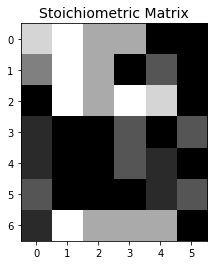

stoic_mtrx=
 [[-5.  6. -4.  4.  0.  0.]
 [-3.  6. -4.  0.  2.  0.]
 [ 0.  6. -4. -6.  5.  0.]
 [-1.  0.  0. -2.  0.  2.]
 [ 1.  0.  0. -2.  1.  0.]
 [-2.  0.  0.  0. -1.  2.]
 [-1.  6. -4. -4.  4.  0.]]


In [3]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
import numpy as np
np.set_printoptions(precision=3,threshold=100,edgeitems=5)
print('stoic_mtrx=\n',stoic_mtrx)

In [4]:
'''Rank of S'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

s_rank = matrix_rank(stoic_mtrx)
print('S shape   = ',stoic_mtrx.shape)
print('Rank of S = ',s_rank)

S shape   =  (7, 6)
Rank of S =  3


## Rank-deficient minimum norm (shortest) least-squares reaction rate solution<a id="rankdefmnls"></a>

In [10]:
'''Compute the MNLS reaction rates for a given species production rates'''

import numpy as np

#g_vec = np.random.random(len(species)) # random production rates
g_vec = np.ones(len(species)) # production rates all ones

# build A x = b MNLS problem
epsilon = 1e-3

a_mtrx = stoic_mtrx @ stoic_mtrx.transpose() + epsilon * np.eye(len(reactions)) # A = S ST + epsilon I, A is the normal matrix
b_vec  = stoic_mtrx @ g_vec                    # b = S g

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# matrix LU factorization of A, the normal matrix
(P,L,U,a_rank) = lu_factorization( a_mtrx, 'partial' ) # matrix is full rank; partial pivoting works
assert a_rank == np.linalg.matrix_rank(a_mtrx)

from chen_3170.help import forward_solve
try:    
    from chen_3170.toolkit import backward_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# solve the LS problem: A x = b
y_vec = forward_solve( L, P @ b_vec)   # L y = P b
x_vec = backward_solve( U, y_vec)      # U x = y

# test my solution against NumPy solve
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

np.set_printoptions(precision=3,threshold=100,edgeitems=3)

print('species production rates g_vec =',g_vec)

r_vec = x_vec # r = x
print('reaction rates r_vec=',r_vec)

rate_norm = np.linalg.norm(r_vec)
print('   ||r|| = %8.3e'%rate_norm)

residual_vec = g_vec - stoic_mtrx.transpose() @ r_vec
print('||g - ST r||^2 + eps*||r||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*rate_norm**2))
print('||g - ST r|| +       ||r||   = %8.5e'%(np.linalg.norm(residual_vec) + rate_norm))
print('||g - ST r||                 = %8.5e'%(np.linalg.norm(residual_vec)))

species production rates g_vec = [1. 1. 1. 1. 1. 1.]
reaction rates r_vec= [ 0.008  0.006  0.004 -0.072 -0.001 -0.072  0.005]
   ||r|| = 1.026e-01
||g - ST r||^2 + eps*||r||^2 = 5.83264e+00
||g - ST r|| +       ||r||   = 2.51773e+00
||g - ST r||                 = 2.41508e+00


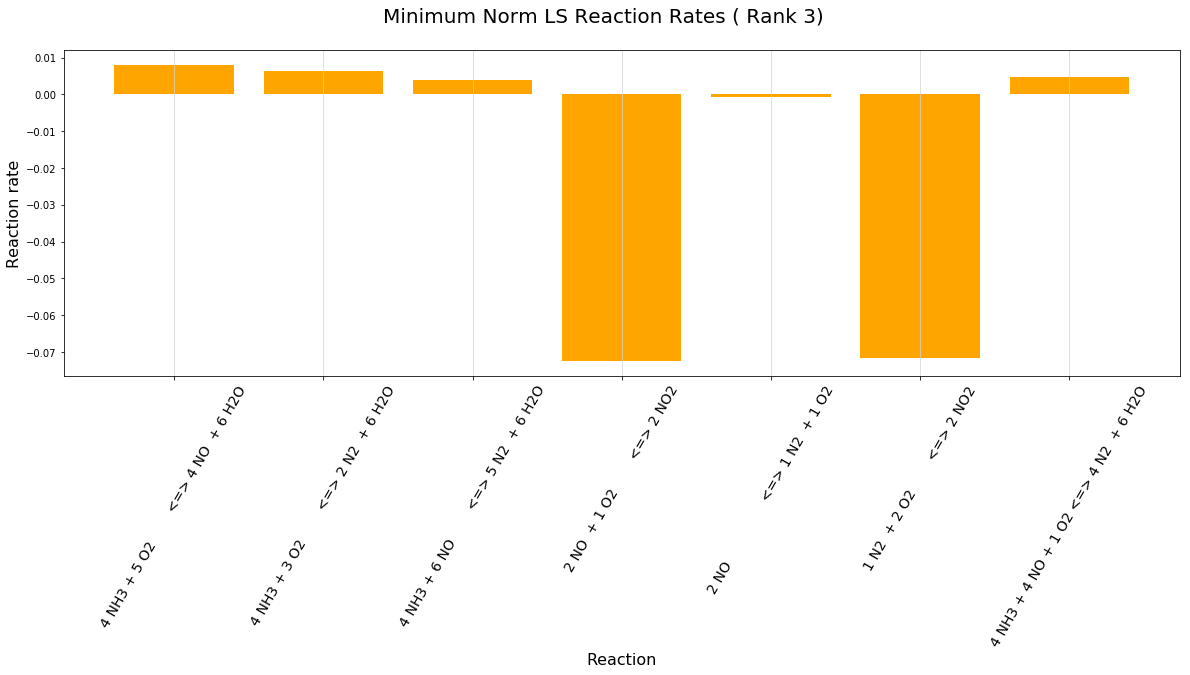

In [11]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), r_vec, color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates ( Rank %s)'%str(s_rank),fontsize=20)
plt.show()